# Trend Lines and Channels Detection

In [2]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import yfinance as yf
# Replace 'BAJFINANCE.BO' with the stock symbol of your choice
symbol = 'ICICIBANK.NS'

# Download stock data using yfinance for the specified date range
stock_data = yf.download(symbol, start='2022-01-01', end='2024-02-20')

df=stock_data
#Check if NA values are in data
df=df[df['Volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df

c:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
1,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
3,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
4,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
522,1006.000000,1027.050049,1000.299988,1019.799988,1019.799988,18706292
523,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
524,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
525,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395


In [3]:
import numpy as np
from matplotlib import pyplot
backcandles= 40 # 6*8
brange = 10 # backcandles//4 #should be less than backcandles
wind = 6

candleid = 245

optbackcandles= backcandles
sldiff = 10

for r1 in range(backcandles-brange, backcandles+brange):
    maxim = np.array([])
    minim = np.array([])
    xxmin = np.array([])
    xxmax = np.array([])
    for i in range(candleid-r1, candleid+1, wind):
        minim = np.append(minim, df.Low.iloc[i:i+wind].min())
        xxmin = np.append(xxmin, df.Low.iloc[i:i+wind].idxmin())
    for i in range(candleid-r1, candleid+1, wind):
        maxim = np.append(maxim, df.High.loc[i:i+wind].max())
        xxmax = np.append(xxmax, df.High.iloc[i:i+wind].idxmax())
    slmin, intercmin = np.polyfit(xxmin, minim,1)
    slmax, intercmax = np.polyfit(xxmax, maxim,1)

    if(abs(slmin-slmax)<sldiff):
        sldiff = abs(slmin-slmax)
        optbackcandles=r1
        slminopt = slmin
        slmaxopt = slmax
        intercminopt = intercmin
        intercmaxopt = intercmax
        maximopt = maxim.copy()
        minimopt = minim.copy()
        xxminopt = xxmin.copy()
        xxmaxopt = xxmax.copy()

        print(optbackcandles)
dfpl = df[candleid-wind-optbackcandles-backcandles:candleid+optbackcandles]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

adjintercmax = (df.High.iloc[xxmaxopt] - slmaxopt*xxmaxopt).max()
adjintercmin = (df.Low.iloc[xxminopt] - slminopt*xxminopt).min()
fig.add_trace(go.Scatter(x=xxminopt, y=slminopt*xxminopt + adjintercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmaxopt, y=slmaxopt*xxmaxopt + adjintercmax, mode='lines', name='max slope'))
fig.show()

30


[*********************100%%**********************]  1 of 1 completed


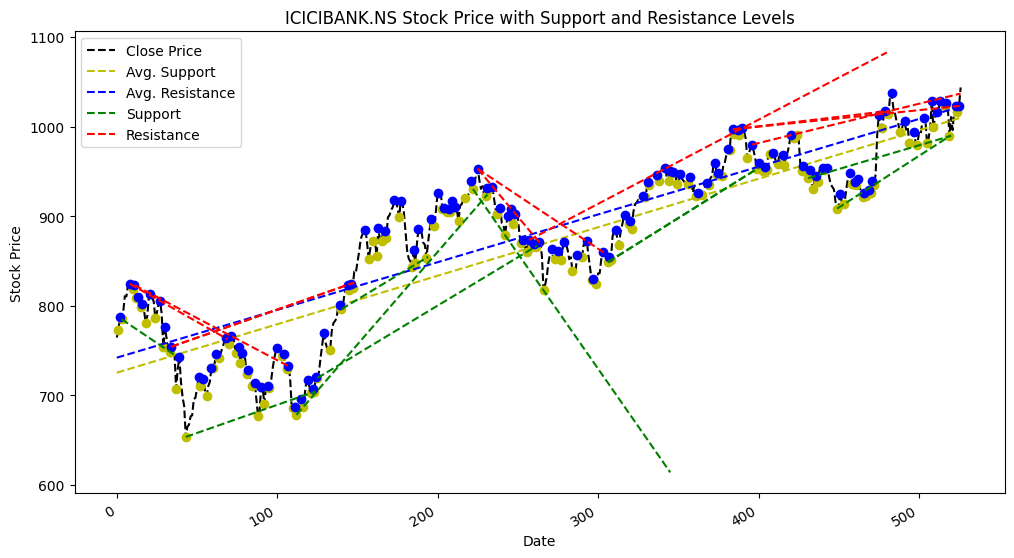

In [4]:
import yfinance as yf
import pandas as pd
import trendln
import matplotlib.pyplot as plt

# Replace 'BAJFINANCE.BO' with the stock symbol of your choice
symbol = 'ICICIBANK.NS'

# Download stock data using yfinance for the specified date range
stock_data = yf.download(symbol, start='2022-01-01', end='2024-02-20')

# Plotting the 'Close' data as a solid line graph
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close', color='blue') 

# Plotting support and resistance lines
fig = trendln.plot_support_resistance(stock_data['Close'], accuracy=8)
plt.title(f'{symbol} Stock Price with Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()